In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
from tqdm import tqdm

import persim as ps

%matplotlib inline

Import files and create dicts with diagrams.

In [2]:
diagram_files = sorted([diag for diag in os.listdir() \
                        if (not (diag.startswith("hole") or diag.startswith("readability"))) \
                        and (diag.endswith("bert") or diag.endswith("glove_cc"))])

In [3]:
def parse_diagram_file(filename):
    diagram = open(filename,"r").read().split("\n\n")[:-1]
    return [np.array([[float(interval.split()[0]),float(interval.split()[1])] for interval in dim.split("\n")]) for dim in diagram]

In [4]:
diagrams_bert  = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith("bert")}
diagrams_glove = {name.split(".")[0] : parse_diagram_file(name) for name in diagram_files if name.endswith("glove_cc")}
names_bert  = sorted(diagrams_bert.keys())
names_glove = sorted(diagrams_glove.keys())
n_texts = len(names_bert)

Compute distances for the diagrams dimension-wise.

In [5]:
print([len(d) for d in diagrams_glove.values()])
print([len(d) for d in diagrams_bert.values()])

[4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [6]:
distances_bert_dim_1_bottleneck  = np.zeros((n_texts,n_texts))
distances_bert_dim_2_bottleneck  = np.zeros((n_texts,n_texts))
distances_glove_dim_1_bottleneck = np.zeros((n_texts,n_texts))
distances_glove_dim_2_bottleneck = np.zeros((n_texts,n_texts))

In [7]:
distances_bert_dim_1_wasserstein  = np.zeros((n_texts,n_texts))
distances_bert_dim_2_wasserstein  = np.zeros((n_texts,n_texts))
distances_glove_dim_1_wasserstein = np.zeros((n_texts,n_texts))
distances_glove_dim_2_wasserstein = np.zeros((n_texts,n_texts))

In [8]:
for i in range(n_texts):
    for j in range(n_texts):
        bi, bj = diagrams_bert[names_bert[i]], diagrams_bert[names_bert[j]]
        gi, gj = diagrams_glove[names_glove[i]], diagrams_glove[names_glove[j]]
        distances_bert_dim_1_bottleneck[i,j]   = ps.bottleneck(bi[1],bj[1])
        distances_bert_dim_2_bottleneck[i,j]   = ps.bottleneck(bi[2],bj[2])
        distances_glove_dim_1_bottleneck[i,j]  = ps.bottleneck(gi[1],gj[1])
        distances_glove_dim_2_bottleneck[i,j]  = ps.bottleneck(gi[2],gj[2])
        distances_bert_dim_1_wasserstein[i,j]  = ps.sliced_wasserstein(bi[1],bj[1])
        distances_bert_dim_2_wasserstein[i,j]  = ps.sliced_wasserstein(bi[2],bj[2])
        distances_glove_dim_1_wasserstein[i,j] = ps.sliced_wasserstein(gi[1],gj[1])
        distances_glove_dim_2_wasserstein[i,j] = ps.sliced_wasserstein(gi[2],gj[2])

In [9]:
def normavg(mats):
    return np.mean([m/m.max() for m in mats], axis = 0)

distances_bert_normavg_bottleneck = normavg([distances_bert_dim_1_bottleneck,distances_bert_dim_2_bottleneck])
distances_bert_normavg_wasserstein = normavg([distances_bert_dim_1_wasserstein,distances_bert_dim_2_wasserstein])
distances_glove_normavg_bottleneck = normavg([distances_glove_dim_1_bottleneck,distances_glove_dim_2_bottleneck])
distances_glove_normavg_wasserstein = normavg([distances_glove_dim_1_wasserstein,distances_glove_dim_2_wasserstein])

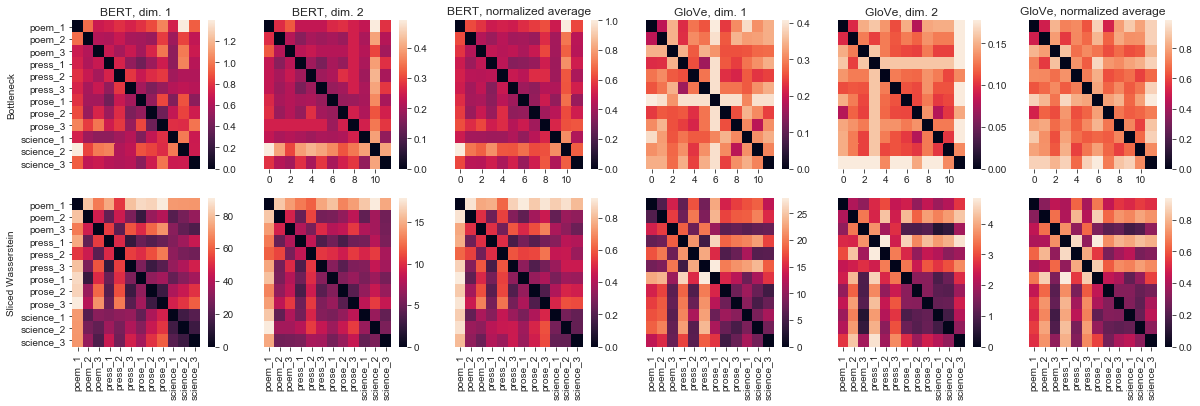

In [10]:
matplotlib.rcParams['figure.figsize'] = 20,6
fig, axs = plt.subplots(2,6)
#fig.tight_layout()

g00 = sns.heatmap(data = distances_bert_dim_1_bottleneck, ax = axs[0][0], cbar = True, yticklabels = names_bert, xticklabels = False)
g10 = sns.heatmap(data = distances_bert_dim_1_wasserstein, ax = axs[1][0], cbar = True, yticklabels = names_bert, xticklabels = names_bert)
g01 = sns.heatmap(data = distances_bert_dim_2_bottleneck, ax = axs[0][1], cbar = True, yticklabels = False)
g11 = sns.heatmap(data = distances_bert_dim_2_wasserstein, ax = axs[1][1], cbar = True, yticklabels = False, xticklabels = names_bert)
g02 = sns.heatmap(data = distances_bert_normavg_bottleneck, ax = axs[0][2], cbar = True, yticklabels = False)
g12 = sns.heatmap(data = distances_bert_normavg_wasserstein, ax = axs[1][2], cbar = True, yticklabels = False, xticklabels = names_bert)
g03 = sns.heatmap(data = distances_glove_dim_1_bottleneck, ax = axs[0][3], cbar = True, yticklabels = False)
g13 = sns.heatmap(data = distances_glove_dim_1_wasserstein, ax = axs[1][3], cbar = True, yticklabels = False, xticklabels = names_bert)
g04 = sns.heatmap(data = distances_glove_dim_2_bottleneck, ax = axs[0][4], cbar = True, yticklabels = False)
g14 = sns.heatmap(data = distances_glove_dim_2_wasserstein, ax = axs[1][4], cbar = True, yticklabels = False, xticklabels = names_bert)
g05 = sns.heatmap(data = distances_glove_normavg_bottleneck, ax = axs[0][5], cbar = True, yticklabels = False)
g15 = sns.heatmap(data = distances_glove_normavg_wasserstein, ax = axs[1][5], cbar = True, yticklabels = False, xticklabels = names_bert)

g00.set(ylabel = "Bottleneck", title = "BERT, dim. 1")
g10.set(ylabel = "Sliced Wasserstein")
g01.set(title = "BERT, dim. 2")
g02.set(title = "BERT, normalized average")
g03.set(title = "GloVe, dim. 1")
g04.set(title = "GloVe, dim. 2")
g05.set(title = "GloVe, normalized average")

fig.savefig("heatmaps_persistence.pdf")

In [11]:
def within_between_comare(distances):
    avg_between_distance = 0
    for i in range(9):
        for j in range(3):
            avg_between_distance += distances[j,i+3]
    for i in range(6):
        for j in range(3):
            avg_between_distance += distances[j+3,i+6]
    for i in range(3):
        for j in range(3):
            avg_between_distance += distances[j+6,i+9]
    avg_between_distance = avg_between_distance / (27+18+9)

    avg_within_distances = []
    for i in range(4):
        avg_within_distances.append(np.mean([distances[i*3+1,i*3],distances[i*3+2,i*3],distances[i*3+2,i*3+1]]))

    avg_within_distances = np.array(avg_within_distances)  
    return np.mean(avg_within_distances - avg_between_distance), np.mean(avg_within_distances)/avg_between_distance#, avg_within_distances / avg_between_distance

In [12]:
print("Mean difference and ratio of averages of distances for barcodes:")
print(within_between_comare(distances_bert_normavg_bottleneck))
print(within_between_comare(distances_bert_normavg_wasserstein))
print(within_between_comare(distances_glove_normavg_bottleneck))
print(within_between_comare(distances_glove_normavg_wasserstein))

Mean difference and ratio of averages of distances for barcodes:
(-0.006638505925357557, 0.987037749396572)
(-0.048130917409540265, 0.8988311009875201)
(-0.002009418192825907, 0.9973140733744855)
(-0.05590790398581166, 0.8928770632664)


In [13]:
from scipy.stats import wasserstein_distance

In [14]:
silhouettes = {file.split(".")[0]:np.load(file) for file in sorted([name for name in os.listdir() if name.endswith(".scores.npy")])}
names = list(silhouettes.keys())
names

['poem_1',
 'poem_2',
 'poem_3',
 'press_1',
 'press_2',
 'press_3',
 'prose_1',
 'prose_2',
 'prose_3',
 'science_1',
 'science_2',
 'science_3']

In [15]:
list(silhouettes.values())[0].shape

(5, 98)

In [16]:
silhouettes_glove = [silhouettes[n][2] for n in names]
silhouettes_bert = [silhouettes[n][4] for n in names]

In [17]:
silh_distances_bert = np.zeros((n_texts,n_texts))
silh_distances_glove = np.zeros((n_texts,n_texts))

for i in range(n_texts):
    for j in range(n_texts):
        silh_distances_glove[i,j] = wasserstein_distance(silhouettes_glove[i],silhouettes_glove[j])
        silh_distances_bert[i,j]  = wasserstein_distance(silhouettes_bert[i],silhouettes_bert[j])

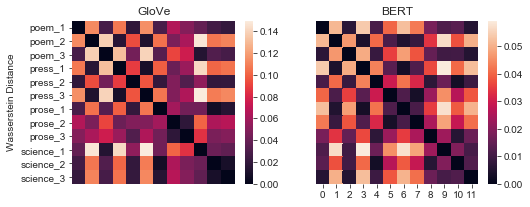

In [18]:
matplotlib.rcParams['figure.figsize'] = 8,3
fig, axs = plt.subplots(1,2)
#fig.tight_layout()

g00 = sns.heatmap(data = silh_distances_glove, ax = axs[0], cbar = True, yticklabels = names_bert, xticklabels = False)
g01 = sns.heatmap(data = silh_distances_bert, ax = axs[1], cbar = True, yticklabels = False)

g00.set(ylabel = "Wasserstein Distance", title = "GloVe")
g01.set(title = "BERT")


fig.savefig("heatmaps_silhouette.pdf")

In [19]:
print(within_between_comare(silh_distances_glove))
print(within_between_comare(silh_distances_bert))

(-0.009313161320877339, 0.8595485129738151)
(-0.002185840879440963, 0.9210736579248159)
